In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2.1. Numpy ndarray - создание

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

* статическая типизация и гомогенность;
* возможность компиляции функций, работающих с статистически типизированными объектами;
* как следствие, эффективное использование RAM и CPU;
* broadcasting (рассмотрим далее).

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4], dtype=np.int16)

In [4]:
a.shape

(4,)

Интереснее, если массив n-мерный: тогда помогает stride (https://en.wikipedia.org/wiki/Stride_of_an_array) и shape массива. Shape - кортеж, который указывает число элементов в каждом измерении. Stride - кортеж, отступ между элементами массива в каждом измерении.

In [5]:
a = np.array([[1, 2], [3, 4]])

In [6]:
a.size

4

In [7]:
a.shape

(2, 2)

In [8]:
a.dtype

dtype('int64')

In [9]:
a.itemsize

8

In [10]:
a.nbytes

32

In [11]:
np.size(a)

4

In [12]:
np.shape(a)

(2, 2)

При необходимости, не стоит принебрегать встроенной справкой:

In [30]:
np.array?

И специальными функциями numpy:

In [31]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
numpy.lib.ar

и IPython:

Разумеется, произвольно присваивать значения элементам массива нельзя:

In [13]:
a[0,0] = "hello"

ValueError: invalid literal for long() with base 10: 'hello'

In [14]:
a[0,0] = 100

**Создание массивов**

Создавать из списков мы уже умеем:

In [15]:
 np.array([1,2,3,4], dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

Разумеется, главное - чтобы объект, корый передается конструктору, поддерживал протокол итерации.

In [16]:
 np.array([x**2 for x in xrange(10)], dtype=np.int16)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int16)

In [17]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [18]:
np.linspace(0, 1, 25)

array([ 0.        ,  0.04166667,  0.08333333,  0.125     ,  0.16666667,
        0.20833333,  0.25      ,  0.29166667,  0.33333333,  0.375     ,
        0.41666667,  0.45833333,  0.5       ,  0.54166667,  0.58333333,
        0.625     ,  0.66666667,  0.70833333,  0.75      ,  0.79166667,
        0.83333333,  0.875     ,  0.91666667,  0.95833333,  1.        ])

In [19]:
np.logspace(0, 10, 10)

array([  1.00000000e+00,   1.29154967e+01,   1.66810054e+02,
         2.15443469e+03,   2.78255940e+04,   3.59381366e+05,
         4.64158883e+06,   5.99484250e+07,   7.74263683e+08,
         1.00000000e+10])

In [20]:
np.ones((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [21]:
np.zeros((3, 2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [22]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [23]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

(100, 100)

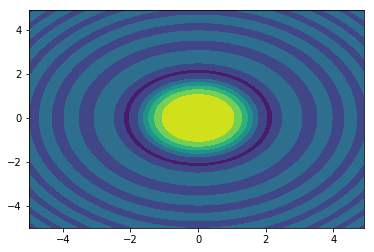

In [24]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
z.shape

In [25]:
xx.shape

(1, 100)

In [26]:
yy.shape

(100, 1)

** Случайные массивы **

на интервале [0,1]:

In [27]:
np.random.rand(3,2)

array([[ 0.1404243 ,  0.3773828 ],
       [ 0.79099843,  0.76645163],
       [ 0.53314336,  0.793341  ]])

Нормально распределенные:

In [28]:
np.random.randn(3,2)

array([[-0.54766191, -0.9735752 ],
       [-0.98260272,  0.09691304],
       [-1.01116335, -0.53423449]])

-- N: иногда полезно получить случайное целое число:

In [29]:
np.random.randint(2,10)

6

In [30]:
np.random.random_integers(2,10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(2, 10 + 1) instead
  """Entry point for launching an IPython kernel.


2

# 2.2. Numpy ndarray - индексы

Отдельно рассмотрим 1-мерный и многомерные массивы.

In [40]:
np.random.rand(3,)[1:3]
np.array([1, 2, 3])[0:2]

array([1, 2])

Для одномерного массива получим сразу элемент, который находится по данному индексу. Для n-мерного массива подобная индексация вернет массив размера n-1.

In [42]:
np.random.rand(3,5,10)[1].shape

(5, 10)

In [8]:
np.random.rand(3,5)[1].shape

(5,)

Можно использовать ':' вместо индекса:

In [45]:
A = np.random.rand(3,5)

In [46]:
A

array([[ 0.86556173,  0.34559063,  0.55169173,  0.29574054,  0.01092836],
       [ 0.33639459,  0.34871113,  0.50243335,  0.269564  ,  0.9877145 ],
       [ 0.73597368,  0.16227919,  0.712238  ,  0.15481434,  0.06884058]])

In [47]:
A[0,:]

array([ 0.86556173,  0.34559063,  0.55169173,  0.29574054,  0.01092836])

In [48]:
A[:,0]

array([ 0.86556173,  0.33639459,  0.73597368])

Поддерживается стандартный протокол - python slicing syntax ([lower:upper:step]) :

In [49]:
A[0,:]

array([ 0.86556173,  0.34559063,  0.55169173,  0.29574054,  0.01092836])

In [50]:
A[0,:][0:4:2]

array([ 0.86556173,  0.55169173])

Операция slicing создает т.н. view - то есть данные не копируются, поэтому исходный объект по адресу - mutable.

In [51]:
A[0,:][0:4:2] = [1.0, 2.5]

In [52]:
A

array([[ 1.        ,  0.34559063,  2.5       ,  0.29574054,  0.01092836],
       [ 0.33639459,  0.34871113,  0.50243335,  0.269564  ,  0.9877145 ],
       [ 0.73597368,  0.16227919,  0.712238  ,  0.15481434,  0.06884058]])

In [54]:
type(A[0,:][0:4:2])

numpy.ndarray

Параметры для slicing могут пропускаться:

In [61]:
A[0,:][0:4:2]

array([ 1. ,  2.5])

In [62]:
A[0,:][0:4]

array([ 1.        ,  0.3718297 ,  2.5       ,  0.79593591])

In [63]:
A[0,:][:3]

array([ 1.       ,  0.3718297,  2.5      ])

In [64]:
A[0,:][::-1]

array([ 0.39127391,  0.79593591,  2.5       ,  0.3718297 ,  1.        ])

In [65]:
A[0,:][-3:]

array([ 2.5       ,  0.79593591,  0.39127391])

** Fancy Indexing **

Этим термином обозначается индексирование с помощью массивов (или иных итерируемых конструкций).

In [55]:
row_indices = [1, 2]
A[row_indices]

array([[ 0.33639459,  0.34871113,  0.50243335,  0.269564  ,  0.9877145 ],
       [ 0.73597368,  0.16227919,  0.712238  ,  0.15481434,  0.06884058]])

In [56]:
col_indices = [1, -1]
A[row_indices, col_indices]

array([ 0.34871113,  0.06884058])

Возможно Булево индексирование (**Boolean indexing**):

In [57]:
B = np.array([n for n in xrange(5)])
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [58]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Это очень удобно, как вы наверняка догадались, если мы хотим отобрать данные, отвечающие определенным условиям:

In [63]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [64]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [65]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

Получить список индексов элементов, отвечающих заданной маске, можно с помощью **which**:

In [68]:
indices = np.where(mask)
?np.where
indices

(array([11, 12, 13, 14]),)

In [69]:
x[indices]

array([ 5.5,  6. ,  6.5,  7. ])

**take** еще одна конструкция выбора элементов массива:

In [70]:
v = np.arange(-3,3)
row_indices = [1, 3, 5]
v

array([-3, -2, -1,  0,  1,  2])

In [71]:
v[row_indices]

array([-2,  0,  2])

In [72]:
v.take(row_indices)

array([-2,  0,  2])

In [73]:
np.take(v, row_indices)

array([-2,  0,  2])

** choose ** - полезная функция для выбора элеметов из нескольких массивов:

In [78]:
which = [1, 0, 1, 0, 1]
choices = [[-1,-2,-3,-4, 5], [1,2,3,4, 6]]
np.choose(which, choices)

array([ 1, -2,  3, -4,  6])

** compress ** - альтернативой Булевому индексированию:

In [83]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print a
np.compress([False, True, True], a, axis=0)

[[1 2]
 [3 4]
 [5 6]]


array([[3, 4],
       [5, 6]])

** При этом take может работать быстрее**:

In [84]:
a = np.random.rand(10000, 100)
ind = np.random.randint(low=0, high=10000, size=10000)

In [82]:
%timeit -n 100 b = a[ind,:]

100 loops, best of 3: 3.78 ms per loop


In [83]:
%timeit -n 100 b = np.take(a, ind, axis=0)

100 loops, best of 3: 3.43 ms per loop


In [84]:
np.array_equal(a[ind,:], np.take(a, ind, axis=0))

True

** Также быстрее может работать compress **:

In [85]:
ind = a[:,0] > .5

In [86]:
%timeit -n 10 b = a[ind,:]

10 loops, best of 3: 1.53 ms per loop


In [87]:
%timeit -n 10 b = np.compress(ind, a, axis=0)

10 loops, best of 3: 1.6 ms per loop


## TLDR:
* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

# 2.3. Numpy ndarray - элементарные операции с массивами

** Broadcasting **

Концепеция broadcasting является ключевой для понимания операций с массивами. Обычно, операции с массивами производятся поэлементно. 

In [85]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,2.0,2.0])

In [86]:
a * b

array([ 2.,  4.,  6.])

Что, если массивы разного размера? Начнем с простого - скаляр и вектор:

In [87]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a * b

array([ 2.,  4.,  6.])

Все просто - скаляр словно "вырастает" (broadcasted) до размеров вектора и производится поэлементная операция (разумеется, это умозрительная аналогия - новый вектор из 2 не создается!).

Общее правило таково:

операция может произведена если размерность "крайних" осей массивов совпадает (trailing dimension), либо один из элементов является скаляром.

Пример из оффициальной документации:

In [88]:
'''

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1pp
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

'''
pass

а вот эти опреции дадут вам ошибку:

In [92]:
'''
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
'''
pass

In [91]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))
i = np.array([[1, 2], [3, 4]])

print x.shape

print y.shape

print i.shape

x + y

(4,)
(5,)
(2, 2)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [94]:
print xx.shape
print y.shape
print (xx + y).shape
print xx + y

print '-------'

print x.shape
print z.shape
print (x + z).shape
print x + z

(4, 1)
(5,)
(4, 5)
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]]
-------
(4,)
(3, 4)
(3, 4)
[[ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]]


** Операции вида "массив - скаляр" **

In [95]:
A

array([[ 1.        ,  0.3718297 ,  2.5       ,  0.79593591,  0.39127391],
       [ 0.77008015,  0.87643969,  0.79656725,  0.83093872,  0.8713768 ],
       [ 0.64228433,  0.96288942,  0.72090708,  0.58830697,  0.76327866]])

In [96]:
A + 2

array([[ 3.        ,  2.3718297 ,  4.5       ,  2.79593591,  2.39127391],
       [ 2.77008015,  2.87643969,  2.79656725,  2.83093872,  2.8713768 ],
       [ 2.64228433,  2.96288942,  2.72090708,  2.58830697,  2.76327866]])

** Операции вида "массив - массив" **

Производятся поэлементно с учетом правил broadcasting:

In [97]:
A * A

array([[ 1.        ,  0.13825732,  6.25      ,  0.63351398,  0.15309527],
       [ 0.59302344,  0.76814653,  0.63451939,  0.69045915,  0.75929753],
       [ 0.41252916,  0.92715604,  0.51970702,  0.34610509,  0.58259431]])

In [98]:
A / A

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

** Матричные операции**

In [92]:
A = np.random.rand(3,3)

In [93]:
np.dot(A,A)

array([[ 0.31972911,  1.45033343,  1.46446373],
       [ 0.51448235,  2.0657729 ,  2.07487328],
       [ 0.39772288,  1.77450967,  1.68626752]])

In [94]:
v = np.random.randn(3)

In [96]:
np.dot(A,v)

array([-1.09119947, -1.7223772 , -1.26944447])

In [97]:
np.dot(v,v)

3.0029840562048258

Если хочется использовать по умолчанию операции из матричной алгебры, то можно использовать конструктор matrix().

In [99]:
M = np.matrix(A)


In [100]:
v1 = np.matrix(v).T

In [101]:
M.shape
print type(M)

<class 'numpy.matrixlib.defmatrix.matrix'>


In [107]:
v1.shape

(3, 1)

In [108]:
v1.T * v1

matrix([[ 0.19385205]])

In [109]:
M * v1

matrix([[ 0.35143133],
        [ 0.16017794],
        [ 0.5448319 ]])

In [110]:
A.T

array([[ 0.3492469 ,  0.21917041,  0.74999904],
       [ 0.33254094,  0.51752262,  0.58769662],
       [ 0.67851364,  0.23048086,  0.95821896]])

** "Flattening" массива **

In [111]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [112]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [113]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

** reshape **

In [114]:
a.shape

(2, 3)

In [115]:
b = a.ravel()

In [116]:
b = b.reshape((2, 3))

In [117]:
b

array([[1, 2, 3],
       [4, 5, 6]])

** resize **

In [118]:
a = np.arange(4)

In [119]:
a.resize((8,))

In [120]:
a

array([0, 1, 2, 3, 0, 0, 0, 0])

** repeat **

In [121]:
a = np.array([[1, 2], [3, 4]])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [122]:
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

** concatenate **

In [123]:
a

array([[1, 2],
       [3, 4]])

In [124]:
b = np.array([[5, 6]])

In [125]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [126]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Что касается параметра axis, то иллюстрировать его использование можно следующим образом:

In [127]:
from IPython.display import Image
Image(filename='axis.png')

IOError: [Errno 2] No such file or directory: u'axis.png'

** hstack **

Название говорит само за себя - horizontal stack.

In [134]:
a

array([[1, 2],
       [3, 4]])

In [135]:
b

array([[5, 6]])

In [128]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

In [129]:
a.shape

(2, 2)

In [130]:
b.T.shape

(2, 1)

** vstack **

In [131]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
a.shape

In [ ]:
b.shape

** Копии и view **

Мы помним, что очень важно различать копирование объекта и присваивание новой ссылки на объект. Numpy в этом смысле не отличается от списков:

In [104]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5,6],[8,9]])
print type(A[0])
print A
print id(A)
print id(A[0])
A[0] = [2,3]
print A
print id(A)
print id(A[0])

print '???'

tt = (1, 2, 3)
tt1 = (1, 2, 3, 4)
ff = [1, 2, 3]
ff1 = [1, 2, 3, 4]
tt = tt1
ff = ff1
print tt, ' ', tt1  
print id(tt), ' ', id(tt1)

print ff, ' ', ff1  
print id(ff), ' ', id(ff1)

<type 'numpy.ndarray'>
[[1 2]
 [3 4]]
140713528702176
140713529364352
[[2 3]
 [3 4]]
140713528702176
140713529364352
???
(1, 2, 3, 4)   (1, 2, 3, 4)
140713529394376   140713529394376
[1, 2, 3, 4]   [1, 2, 3, 4]
140713529169968   140713529169968


In [105]:
B = A
print id(A)
print id(B)

140713528702176
140713528702176


In [106]:
B[0,0] = 10
print id(A)
print id(B)
print type(B)
print type(B[0])
a = ([1, 2], [3, 4])
b = a
a[0][0] = -1
b

140713528702176
140713528702176
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


([-1, 2], [3, 4])

In [107]:
A

array([[10,  3],
       [ 3,  4]])

Если это не тот тип поведения, который нам нужен - следует использовать np.copy():

In [108]:
B = np.copy(A)

In [109]:
B[0,0] = 100

In [110]:
A

array([[10,  3],
       [ 3,  4]])

Важно помнить, что если вы используете view массива, то копии вы не создаете!

In [111]:
a = np.arange(10)

In [112]:
b = a[::2]

In [113]:
np.may_share_memory(a, b)

True

In [114]:
c = a[::2].copy()
np.may_share_memory(a, c)

False

In [115]:
d = a.T
np.may_share_memory(a, d)

True

## TLDR:
* следует отличать копию массива и view;
* при осуществлении операций помните про правила broadcasting;
* запомните hstack и vstack.

# 2.4. Numpy - основные функции.

** Встроенные функции массива **

In [ ]:
m = np.random.rand(3,3)

In [ ]:
m.sum()

In [ ]:
m.max()

** Всегда используйте встроенные функции! **

In [ ]:
a = np.random.rand(100000)

In [ ]:
% timeit max(a)

In [ ]:
% timeit a.max()

In [ ]:
% timeit sum(a)

In [ ]:
% timeit a.sum()

Просто считать сумму элементов матрицы или находить максимальный элемент не так интересно, и тут нам помогают axis:

In [ ]:
m

In [ ]:
m.sum(axis=0)

In [ ]:
m.sum(axis=1)

In [ ]:
m.max(axis=0)

Очень полезно произведение всех элементов:

In [ ]:
m.prod(axis=1)

Кумулятивная сумма элементов:

In [116]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [118]:
a.cumsum() 

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

Кумулятивное произведение:

In [120]:
a.cumprod()
np.may_share_memory(a, a.cumprod())

False

**Простые статистики**

**Среднее**

In [ ]:
m.mean(axis=0)

In [ ]:
np.mean(m, axis=0)

In [ ]:
np.mean(a)

In [ ]:
a.mean()

**Медиана**

In [ ]:
np.median(m, axis=0)

In [ ]:
np.median(a)

** Дисперсия **

In [ ]:
np.std(m, axis=0)

In [ ]:
m.std(axis=0)

In [ ]:
np.var(a)

In [ ]:
a.var()

** Сортировка **

In [126]:
np.sort(a)
np.may_share_memory(a, a.sort())

False

Функция выше возвращает отсортированную копию массива. Если нужна сортировка in-place:

In [125]:
a = np.array([13, 22, 6, 4, 5])
x = np.sort(a)
print id(x)
print id(a)
a.sort()
print id(a)

140713528704656
140713528704896
140713528704896


In [127]:
a = np.random.rand(100000)

Также иногда бывает полезно получить только список индексов в правильном порядке:

In [128]:
np.argsort(a)

array([96395, 96573, 90677, ..., 91282, 70384, 92410])

In [129]:
np.argmax(a)

92410

In [130]:
np.argmin(a)

96395

In [131]:
np.nonzero(a)

(array([    0,     1,     2, ..., 99997, 99998, 99999]),)

** Функции для работы с матрицами **

In [140]:
m = np.array([1, 2, 3])

In [141]:
np.diag(m)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [142]:
m.diagonal()

ValueError: diag requires an array of at least two dimensions

Для целого класса функций из линейной алгебры есть свой суб-модуль np.linalg.

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

In [143]:
MM = np.random.randn(9, 6)

In [144]:
U, s, V = np.linalg.svd(MM, full_matrices=False)
U.shape, V.shape, s.shape

((9, 6), (6, 6), (6,))

In [145]:
S = np.diag(s)
np.allclose(MM, np.dot(U, np.dot(S, V)))

True

** Векторизация кода **

В numpy есть встроенная функция vectorize, которая "автоматически" векторизует вашу функцию:

In [146]:
def heavyside(x):
    if x >= 0:
        return 1
    else:
        return 0

In [147]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [148]:
heavyside_vec = np.vectorize(heavyside)

In [149]:
heavyside_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Тем не менее, лучше сразу пишите так:

In [150]:
def heavyside(x):
    return 1 * (x >= 0)

In [151]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

** Условные выражения **

Как вы уже поняли, для вектора конструкция типа if (vector) не подходит.

In [171]:
M = np.array([1, 2, 3, 6])
print M
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")



[1 2 3 6]
at least one element in M is larger than 5


In [172]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## TLDR:
- всегда используйте встроенные в np функции;
- векторизуйте везде, где это возможно!

# 2.5. Numpy - I/O.

В даноом случае у нас на выбор 2 опции - либо формат numpy, либо просто текстовый файл.

In [173]:
np.save("random.npy", M)

In [174]:
np.load("random.npy")

array([1, 2, 3, 6])

In [175]:
np.savetxt('random.csv', M, delimiter='\t')

In [176]:
! cat random.csv

1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
6.000000000000000000e+00


In [177]:
np.loadtxt('random.csv')

array([ 1.,  2.,  3.,  6.])